In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2dd5831277c75fbab108c30261d1b041


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | samusu
City not found. Skipping...
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | kamenka
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | les cayes
Processing Record 10 of Set 1 | lucapa
Processing Record 11 of Set 1 | snasa
Processing Record 12 of Set 1 | mercedes
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | kodiak
P

Processing Record 35 of Set 4 | maniitsoq
Processing Record 36 of Set 4 | constitucion
Processing Record 37 of Set 4 | sur
Processing Record 38 of Set 4 | ewa beach
Processing Record 39 of Set 4 | centralia
Processing Record 40 of Set 4 | kupang
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | atar
Processing Record 43 of Set 4 | guerrero negro
Processing Record 44 of Set 4 | shuyskoye
Processing Record 45 of Set 4 | miramar
Processing Record 46 of Set 4 | tecoanapa
Processing Record 47 of Set 4 | keuruu
Processing Record 48 of Set 4 | avarua
Processing Record 49 of Set 4 | joshimath
Processing Record 50 of Set 4 | manapparai
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | sonoita
Processing Record 4 of Set 5 | qabis
City not found. Skipping...
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | deputatskiy
Processing Record 7 of Set 5 | kahului
Processing Record 8 of Set 5 | od

Processing Record 20 of Set 8 | saint-pierre
Processing Record 21 of Set 8 | pozo colorado
Processing Record 22 of Set 8 | lancaster
Processing Record 23 of Set 8 | si bun ruang
Processing Record 24 of Set 8 | maningrida
Processing Record 25 of Set 8 | abu samrah
Processing Record 26 of Set 8 | verkhniye sergi
Processing Record 27 of Set 8 | mecca
Processing Record 28 of Set 8 | raigarh
Processing Record 29 of Set 8 | bodden town
Processing Record 30 of Set 8 | nova olinda do norte
Processing Record 31 of Set 8 | lerwick
Processing Record 32 of Set 8 | padang
Processing Record 33 of Set 8 | lisakovsk
Processing Record 34 of Set 8 | skoghall
Processing Record 35 of Set 8 | imelda
Processing Record 36 of Set 8 | artyk
City not found. Skipping...
Processing Record 37 of Set 8 | labuhan
Processing Record 38 of Set 8 | lapua
Processing Record 39 of Set 8 | dubenskiy
City not found. Skipping...
Processing Record 40 of Set 8 | lompoc
Processing Record 41 of Set 8 | zagreb
Processing Record 42

Processing Record 11 of Set 12 | pimenta bueno
Processing Record 12 of Set 12 | ampanihy
Processing Record 13 of Set 12 | zhigansk
Processing Record 14 of Set 12 | kurumkan
Processing Record 15 of Set 12 | kohtla-jarve
Processing Record 16 of Set 12 | adrar
Processing Record 17 of Set 12 | horodyshche
Processing Record 18 of Set 12 | westport
Processing Record 19 of Set 12 | udachnyy
Processing Record 20 of Set 12 | cozumel
Processing Record 21 of Set 12 | chunskiy
Processing Record 22 of Set 12 | weyburn
Processing Record 23 of Set 12 | bumba
Processing Record 24 of Set 12 | kayerkan
Processing Record 25 of Set 12 | dubbo
Processing Record 26 of Set 12 | lamak
Processing Record 27 of Set 12 | mankapur
Processing Record 28 of Set 12 | portland
Processing Record 29 of Set 12 | yugorsk
Processing Record 30 of Set 12 | tiznit
Processing Record 31 of Set 12 | susangerd
Processing Record 32 of Set 12 | orlik
Processing Record 33 of Set 12 | crotone
Processing Record 34 of Set 12 | kralendij

In [10]:
len(city_data)

543

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,30.20,100,90,8.05,CA,2021-05-24 19:52:37
1,Hermanus,-34.4187,19.2345,60.91,82,55,7.38,ZA,2021-05-24 19:52:09
2,Tura,25.5198,90.2201,73.13,92,100,6.31,IN,2021-05-24 19:53:52
3,Kamenka,51.3223,42.7678,57.96,85,100,3.94,RU,2021-05-24 19:52:40
4,Victoria,22.2855,114.1577,84.33,88,71,1.01,HK,2021-05-24 19:51:16
5,Tiksi,71.6872,128.8694,35.49,70,97,7.76,RU,2021-05-24 19:53:32
6,Les Cayes,18.2000,-73.7500,85.35,65,66,10.74,HT,2021-05-24 19:54:33
7,Lucapa,-8.4192,20.7447,66.02,51,55,3.18,AO,2021-05-24 19:52:06
8,Snasa,64.2457,12.3778,58.41,71,56,5.12,NO,2021-05-24 19:54:34
9,Mercedes,-34.6515,-59.4307,64.04,65,0,11.99,AR,2021-05-24 19:54:34


In [15]:
#Re-order columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2021-05-24 19:52:37,69.4541,-133.0374,30.20,100,90,8.05
1,Hermanus,ZA,2021-05-24 19:52:09,-34.4187,19.2345,60.91,82,55,7.38
2,Tura,IN,2021-05-24 19:53:52,25.5198,90.2201,73.13,92,100,6.31
3,Kamenka,RU,2021-05-24 19:52:40,51.3223,42.7678,57.96,85,100,3.94
4,Victoria,HK,2021-05-24 19:51:16,22.2855,114.1577,84.33,88,71,1.01
5,Tiksi,RU,2021-05-24 19:53:32,71.6872,128.8694,35.49,70,97,7.76
6,Les Cayes,HT,2021-05-24 19:54:33,18.2000,-73.7500,85.35,65,66,10.74
7,Lucapa,AO,2021-05-24 19:52:06,-8.4192,20.7447,66.02,51,55,3.18
8,Snasa,NO,2021-05-24 19:54:34,64.2457,12.3778,58.41,71,56,5.12
9,Mercedes,AR,2021-05-24 19:54:34,-34.6515,-59.4307,64.04,65,0,11.99


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

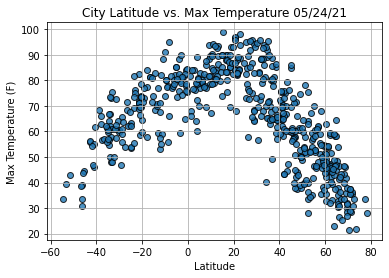

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

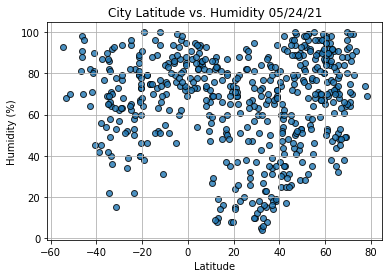

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

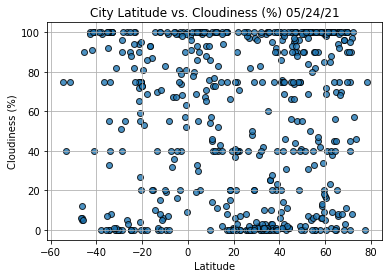

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

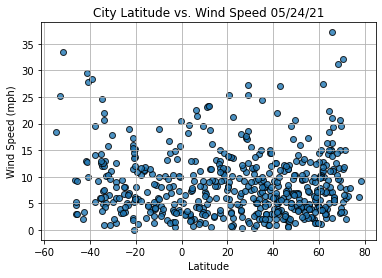

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()